<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/notebooks/M3_1_ann_intro_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Understanding Artificial Neural Networks

The primary goal of this tutorial is to provide answers to the following questions:

> 1. **What is the structure of an Artificial Neural Network?**
2. **How to train an Artificial Neural Network?**
   - 2.1 How can we assess the performance of our model?
   - 2.2 What methods can we use to determine the optimal values for parameters like weights and biases?
   - 2.3 How feasible is it to find the best parameter values when dealing with a massive number of parameters, such as 10 million?
   - 2.4 Can you highlight the differences between Batch Gradient Descent and Stochastic Gradient Descent in the context of Machine Learning?
3. **Why do we need Deep Learning frameworks like PyTorch?**
   - 3.1 What is the procedure for constructing a Neural Network that encompasses various layers, including input, hidden, and output layers?
   - 3.2 What strategies can be employed to mitigate the issue of overfitting in a complex neural network?
   - 3.3 How to save and load a trained model using Pytorch?


Before we look at why neural networks work, it’s important to understand what neural networks do.

# 1. What is the structure of an Artificial Neural Network?

1. First, a weight is being applied to each input to an artificial neuron.
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum.
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

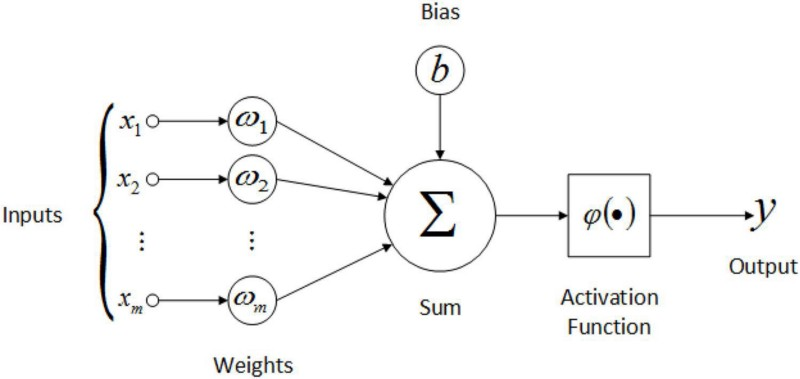

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent.

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

### Types of Activation Functions

Activation functions are crucial in neural networks as they introduce non-linearity, allowing the network to solve complex problems and make predictions or classifications.

![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/activation_functions.png)

# 2. How to train an Artificial Neural Network?

In order to build a neural network, the following steps must be followed:

1. Creating a FeedForwardNetwork

```
- 1.1. Structure (Architecture) of NN
- 1.2. Loss Function
- 1.3. Optmization Approach
```

2. Forward Pass
3. FeedForward Evaluation
4. Backward Pass / Gradient Calculation
5. Back Propagation / Update Weights
6. Training Loop

In [ ]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
from tqdm import tqdm_notebook


![Swedish Committee on Analysis of Risk Premium in Motor Insurance. read more]()

![Swedish Committee on Analysis of Risk Premium in Motor Insurance. read more](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Auto-Insurance.jpeg)

![]()

## Overview

In the dataset:

- \( X \) = number of claims
- \( Y \) = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

**Reference:** Swedish Committee on Analysis of Risk Premium in Motor Insurance


In [ ]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

In [ ]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [ ]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_s = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
data_s.head()

,X,Y
0,0.870968,0.929654
1,0.153226,0.109427
2,0.104839,0.037186
3,1.000000,1.000000
4,0.322581,0.282804


In [ ]:
# Define a function f that represents the line that generates y_pred
w = 1
def nn(x, w):
    return x * w

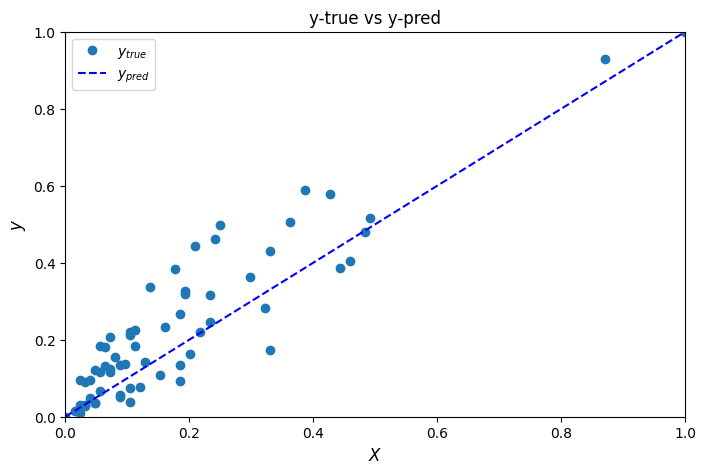

In [ ]:
def plot_data_and_prediction(data, f, w):
    plt.figure(figsize=(8, 5))

    # Plot the target vs input and the initial line
    plt.plot(data.X, data.Y, 'o', label='$y_{true}$')
    plt.plot([0, 1], [f(0, w), f(1, w)], 'b--', label='$y_{pred}$')

    # Set labels, title, axis, and legend
    plt.xlabel('$X$', fontsize=12)
    plt.ylabel('$y$', fontsize=12)
    plt.axis((0, 1, 0, 1))
    plt.title('y-true vs y-pred')
    plt.legend(loc=2)
    plt.show()

# Using the provided function to plot
plot_data_and_prediction(data_s, nn, w)

# 2.1 How can we figure out how well our modeling is performing?
## Mean Squared Error (MSE)
### Definition

The Mean Squared Error (MSE) is a measure of the average of the squares of the "errors", that is, the difference between the true value and what is predicted (estimated). It's a popular metric for regression problems to evaluate the performance of a model.
### Formula
The formula for calculating MSE is given by:

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$


- \( n \) is the number of data points or samples.
- \( $y_i$ \) is the actual value of the \( $i^{th}$ \) data point.
- \( $\hat{y}_i$) is the predicted value of the \( $i^{th}$ ) data point.

In [ ]:
def nn(x, w):
    """Output function y = x * w"""
    return x * w


def loss(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

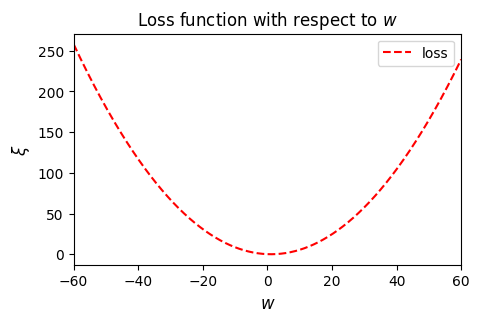

In [ ]:
def plot_loss_vs_weight(data, loss_function, nn_function):
    # Vector of weights and their corresponding losses
    ws = np.linspace(-60, 60, num=1000)
    loss_ws = np.vectorize(lambda w: loss_function(nn_function(data.X, w), data.Y))(ws)

    # Plot
    plt.figure(figsize=(5, 3))
    plt.plot(ws, loss_ws, 'r--', label='loss')
    plt.xlabel('$w$', fontsize=12)
    plt.ylabel('$\\xi$', fontsize=12)
    plt.title('Loss function with respect to $w$')
    plt.xlim(-60, 60)
    plt.legend()
    plt.show()
    return loss_ws, ws

# Using the function to plot
loss_ws, ws = plot_loss_vs_weight(data_s, loss, nn)

# 2.2 How do we find out the optimal values for parameters (weights and biases)?

In [ ]:
# Find the minimum loss and its corresponding weight
min_loss = np.min(loss_ws)
min_loss_index = np.argmin(loss_ws)
min_loss_weight = ws[min_loss_index]

min_loss, min_loss_weight

(0.008160319473215428, 1.1411411411411407)

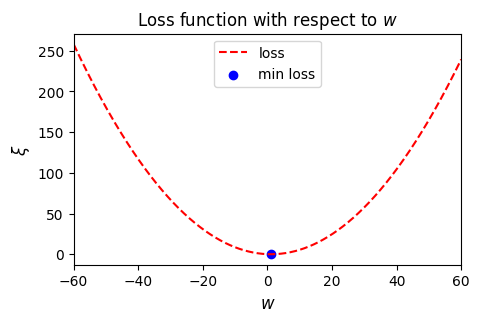

(0.008160319473215428, 1.1411411411411407)

In [ ]:
# Function to plot loss vs weight
def plot_loss_vs_weight(data, loss_function, nn_function):
    # Vector of weights and their corresponding losses
    ws = np.linspace(-60, 60, num=1000)
    loss_ws = np.vectorize(lambda w: loss_function(nn_function(data.X, w), data.Y))(ws)

    # Find minimum loss and corresponding weight
    min_loss = np.min(loss_ws)
    min_loss_w = ws[np.argmin(loss_ws)]

    # Plot
    plt.figure(figsize=(5, 3))
    plt.plot(ws, loss_ws, 'r--', label='loss')
    plt.scatter(min_loss_w, min_loss, color='blue', label='min loss')
    plt.xlabel('$w$', fontsize=12)
    plt.ylabel('$\\xi$', fontsize=12)
    plt.title('Loss function with respect to $w$')
    plt.xlim(-60, 60)
    plt.legend()
    plt.show()

    return loss_ws, ws, min_loss, min_loss_w

# Using the function to plot
loss_ws, ws, min_loss, min_loss_w = plot_loss_vs_weight(data_s, loss, nn)

min_loss, min_loss_w


# Exercise 1

**Explore the linear modeling of data based on different values for w, such as 10, 5, 2, and 1, to find the minimum value of the loss function!**

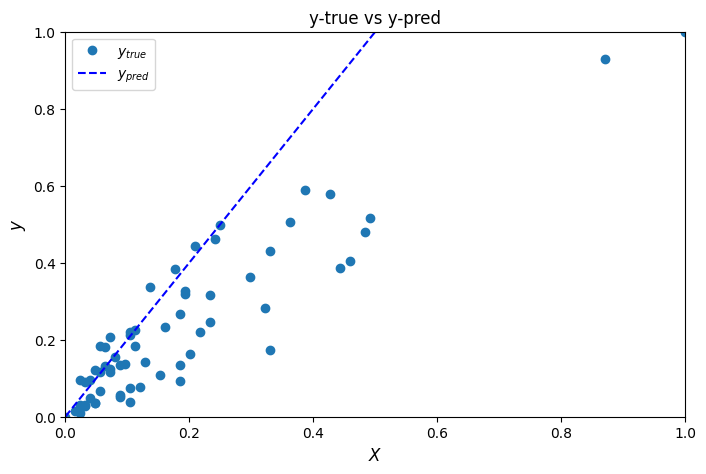

In [ ]:
# Define a function f that represents the line that generates y_pred
w = 2

# Using the provided function to plot
plot_data_and_prediction(data_s, nn, w)

# 2.3 Is it still easy to find the best value when we have, say, 10M parameters?

Finding optimal values for a vast number of parameters by exploring all possible combinations is an impractical approach. In other words, trying to find the best settings by looking at every possible option when you have millions of dials to adjust would take an impossible amount of time and computer power. It’s like trying to find a needle in a haystack, except the haystack is as big as a planet.

Here where is Mathematics (Gradient) comes into play!

The main idea behind the gradient of a function is that a function can have critical points where the gradient becomes zero. At these points, the function can have a minimum, maximum, or saddle (minimax) point. By selecting an initial value for a parameter like 'w' and considering the value and direction of the gradient, we can determine how to adjust the parameter value to find these critical points. This process is often referred to as 'descent,' especially when the goal is to find the minimum, as it involves moving in the direction that reduces the function's value. This reduction is typically achieved by subtracting a fraction of the gradient from the parameters.

The derivative of a function at a point shows the slope of the function at that point, and the gradient is an extension of the derivative for functions with more than one variable.

**In simpler terms, Gradient represents the slope of the function at a particular point.**

![image.png](https://i.stack.imgur.com/L1V3Y.png)

In [ ]:
import matplotlib.cm as cm

def plot_gradients_with_labels(data, loss_function, nn_function, num_points=6):
    # Vector of weights and their corresponding losses
    ws = np.linspace(-60, 60, num=1000)
    loss_ws = np.vectorize(lambda w: loss_function(nn_function(data.X, w), data.Y))(ws)

    # Function to approximate the derivative (slope) at a given point
    def derivative_at_point(w_index):
        h = 1e-5  # Small step for numerical derivative
        w = ws[w_index]
        loss_w_plus_h = loss_function(nn_function(data.X, w + h), data.Y)
        loss_w = loss_ws[w_index]
        return (loss_w_plus_h - loss_w) / h

    # Select points for gradient
    selected_indices = np.round(np.linspace(0, len(ws) - 1, num_points)).astype(int)
    colors = cm.viridis(np.linspace(0, 1, num_points))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(ws, loss_ws, 'r--', label='loss')
    for index, color in zip(selected_indices, colors):
        w = ws[index]
        loss_w = loss_ws[index]
        slope = derivative_at_point(index)

        # Larger line segment to represent the gradient
        line_length = 10  # Adjusted for better visibility
        tangent_x = np.array([w - line_length / 2, w + line_length / 2])
        tangent_y = slope * (tangent_x - w) + loss_w
        plt.plot(tangent_x, tangent_y, color=color, linewidth=2)
        plt.scatter(w, loss_w, color=color)
        plt.text(w, loss_w, f'Slope: {slope:.2f}', color=color, fontsize=9, verticalalignment='bottom')

    plt.xlabel('$w$', fontsize=12)
    plt.ylabel('$\\xi$', fontsize=12)
    plt.title('Loss function with respect to $w$ with Gradients and Slope Values')
    plt.xlim(-60, 60)
    plt.legend()
    plt.show()

    return loss_ws, ws

# Usage example (assuming data_s, loss, and nn are defined)
# loss_ws, ws = plot_gradients_with_labels(data_s, loss, nn)

# Note: The function call is commented out as we do not have the actual data_s, loss, and nn defined here.

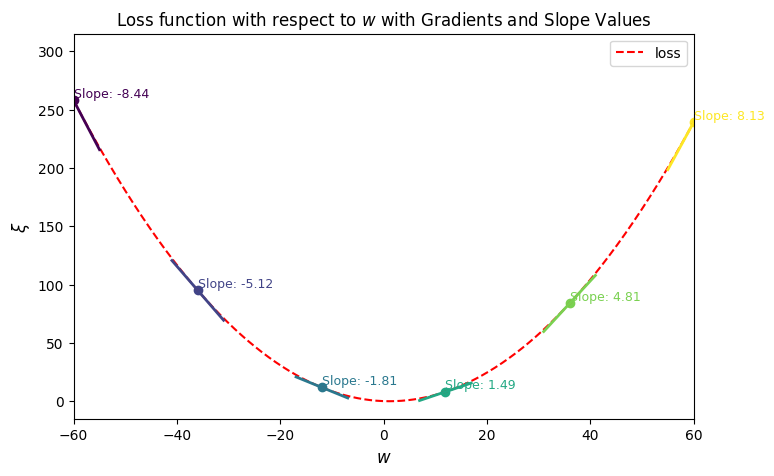

In [ ]:
loss_ws, ws = plot_gradients_with_labels(data_s, loss, nn)

## Gradient of the MSE with respect to the weight (𝑤)

Mean Squared Error (MSE) Loss Function:

$$
  \text{L} = \text{MSE} = \frac{1}{n}\sum_{i=1}^{n} \bigl(y_i - \hat{y}_i\bigr)^2
             = \frac{1}{n}\sum_{i=1}^{n} \bigl(y_i - w x_i\bigr)^2
$$
Also we know that:

$$ \hat{y}_i = w_ix_i $$

### **Backward Pass / Gradient Calculation**

For a linear regression model with $( \hat{y}_i = w_ix_i )$, the gradient of the MSE with respect to the weight $( w )$ is:

$$
\frac{\partial \text{L}}{\partial w}
= \frac{1}{n}\sum_{i=1}^{n} \frac{\partial}{\partial w}
  \bigl(y_i - w x_i\bigr)^2 = \frac{1}{n}\sum_{i=1}^{n} 2\bigl(y_i - w x_i\bigr)
  \cdot \frac{\partial}{\partial w}\bigl(y_i - w x_i\bigr) = \frac{1}{n}\sum_{i=1}^{n} 2\bigl(y_i - w x_i\bigr)
  \cdot -x_i = \frac{2}{n}\sum_{i=1}^{n} x_i\bigl( wx_i - y_i\bigr)
$$

### Explanation:

1. The derivative of $(y_i - \hat{y}_i)^2$ with respect to $( y_i )$ is $2(y_i - \hat{y}_i)$.
2. The derivative of $( y_i - w x_i)$ with respect to $( w_i )$ is $(- x_i )$.
3. Using the chain rule, the derivative of the loss with respect to $( w_i )$ is $( 2(y_i - \hat{y}_i) \times - x_i )$.
4. Averaging over all data points gives the gradient:
   $$
   \frac{\partial L}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} x_i(\hat{y}_i - y_i)
   $$

This gradient provides direction and magnitude to adjust \( w \) to minimize the loss during gradient descent.


**Chain Rule**

Chain Rule for Derivatives:

$\frac{d}{dx} f(g(x)) = f'(g(x)) \cdot g'(x)$

Used when a function is composed of another function.

### **Back Propagation / Update Weights**

The gradient descent formula is used to update the parameters of a model in order to minimize a cost or loss function. It's an iterative process that adjusts the parameters in the direction that reduces the cost function. The formula is as follows:

$ w_{\text{new}} = w_{\text{old}} - \alpha \cdot \nabla J(w_{\text{old}})$

Where:
- $( w_{\text{new}})$ is the updated parameter vector.
- $( w_{\text{old}})$ is the current parameter vector.
- $( \alpha)$ is the learning rate, determining the step size in each iteration.
- $\nabla J(w_{\text{old}})$ is the gradient of the cost or loss function \( L \) with respect to the parameters $w$ at the current values $w_{\text{old}}$.

This formula is used iteratively until convergence to find the parameter values that minimize the cost function.


# 2.4 Understanding the Differences Between Batch Gradient Descent and Stochastic Gradient Descent in Machine Learning

There are three main types of gradient descent:
> - **Batch Gradient Descent:** Batch Gradient Descent computes the gradient of the cost function with respect to the parameters for the entire training dataset. Computationally efficient when the dataset fits in memory because it can benefit from vectorized operations. Can be very slow for large datasets
- **Stochastic Gradient Descent:** Stochastic Gradient Descent (SGD) computes the gradient and updates the parameters for each training example one at a time. Can handle large datasets since it only requires one training example in memory at a time. Less accurate convergence. The path to the minimum is noisy compared to Batch Gradient Descent.
- **Mini-Batch Gradient Descent:** Mini-Batch Gradient Descent computes the gradient of the cost function and updates the parameters using a subset of the training data, rather than the entire dataset or a single training example. Faster computation than Batch Gradient Descent, as it doesn't need to process the entire dataset before making updates. The mini-batch size is an additional hyperparameter to tune, and finding the optimal size can be challenging.

Here, I'll explain Batch Gradient Descent and Stochastic Gradient Descent in a simple and clear manner.

### Batch Gradient Descent

In [ ]:
# Initializing Hyperparameters
epochs = 5
learning_rate = 2


# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
def nn(x, w):
    """Output function y = x * w"""
    return x * w

# 1.2 Loss Function
def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

# 1.3 Optmization Approch
def gradient(w, x, t):
    """Compute the gradient."""
    y = x * w
    return np.mean(2 * x * (y - t))

def delta_w(w_i, x, t, learning_rate):
    """Compute the weight update."""
    return learning_rate * gradient(w_i, x, t)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for i in range(epochs):

    # 2. Forward Pass
    output = nn(data_s.X, w)

    # 3. FeedForward Evaluation
    loss_val = loss(output, data_s.Y)

    # 4. Backward Pass / Gradient Calculation
    grad_value = gradient(w, data_s.X, data_s.Y)  # Compute gradient
    dw = delta_w(w, data_s.X, data_s.Y, learning_rate)

    # 5. Back Propagation / Update Weights
    w = w - dw
    w_his.append(w)

    # Print gradient, dw, weight, and loss values in a single line
    print(f"Iteration {i+1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w({i}): {w:.4f}, loss: {loss_val:.4f}")

Iteration 1: Gradient = 6.7463, Δw = 13.4926, w(0): 36.5074, loss: 164.8565
Iteration 2: Gradient = 4.8837, Δw = 9.7675, w(1): 26.7399, loss: 86.3965
Iteration 3: Gradient = 3.5354, Δw = 7.0708, w(2): 19.6691, loss: 45.2797
Iteration 4: Gradient = 2.5593, Δw = 5.1186, w(3): 14.5505, loss: 23.7326
Iteration 5: Gradient = 1.8527, Δw = 3.7054, w(4): 10.8451, loss: 12.4409


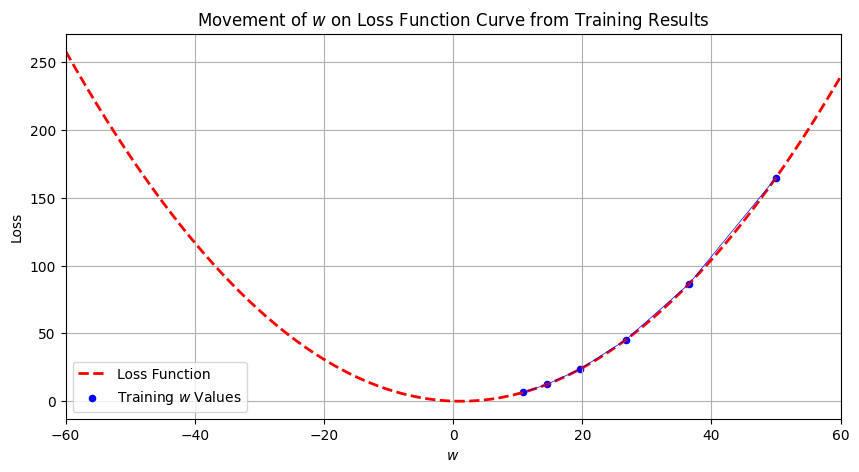

In [ ]:
# Plotting Loss Function Curve
plt.figure(figsize=(10, 5))
plt.plot(ws, loss_ws, 'r--', label='Loss Function', linewidth=2)

# Plotting w values from the training
plt.scatter(w_his, np.interp(w_his, ws, loss_ws), color='blue', s=20, label='Training $w$ Values')
plt.plot(w_his, np.interp(w_his, ws, loss_ws), color='blue', linestyle='-', linewidth=0.5)

plt.title('Movement of $w$ on Loss Function Curve from Training Results')
plt.xlabel('$w$')
plt.ylabel('Loss')
plt.xlim(-60, 60)
plt.legend()
plt.grid(True)
plt.show()

### Stochastic Gradient Descent

In [ ]:
# Initializing Hyperparameters
epochs = 1
learning_rate = 2

# Initializing Parameters
w = 10

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
def nn(x, w):
    """Output function y = x * w"""
    return x * w

# 1.2 Loss Function
def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

# 1.3 Optmization Approach
def gradient(w, x, t):
    """Compute the gradient."""
    y = x * w
    return np.mean(2 * x * (y - t))

def delta_w(w_i, x, t, learning_rate):
    """Compute the weight update."""
    return learning_rate * gradient(w_i, x, t)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(data_s['X'])):
        x_i, t_i = data_s['X'][i], data_s['Y'][i]

        # 2. Forward Pass
        output = nn(x_i, w)

        # 3. FeedForward Evaluation
        loss_val = loss(output, t_i)

        # 4. Backward Pass / Gradient Calculation
        grad_value = gradient(w, x_i, t_i)  # Compute gradient
        dw = delta_w(w, x_i, t_i, learning_rate)

        # 5. Back Propagation / Update Weights
        w = w - dw

        w_his.append(w)

        # Accumulate loss
        total_loss += loss_val

        # Print gradient, dw, weight, and loss values in a single line
        print(f"Epoch {epoch+1}, Sample {i+1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

    # Print average loss for the epoch
    avg_loss = total_loss / len(data_s['X'])
    print(f"Epoch {epoch+1}: Average Loss = {avg_loss:.4f}\n")


Epoch 1, Sample 1: Gradient = 13.5523, Δw = 27.1046, w: -17.1046, loss: 60.5288
Epoch 1, Sample 2: Gradient = -0.8367, Δw = -1.6734, w: -15.4312, loss: 7.4545
Epoch 1, Sample 3: Gradient = -0.3470, Δw = -0.6940, w: -14.7372, loss: 2.7389
Epoch 1, Sample 4: Gradient = -31.4743, Δw = -62.9487, w: 48.2115, loss: 247.6586
Epoch 1, Sample 5: Gradient = 9.8512, Δw = 19.7023, w: 28.5092, loss: 233.1514
Epoch 1, Sample 6: Gradient = 11.6760, Δw = 23.3521, w: 5.1571, loss: 161.2963
Epoch 1, Sample 7: Gradient = 0.3049, Δw = 0.6097, w: 4.5474, loss: 0.6753
Epoch 1, Sample 8: Gradient = 0.0745, Δw = 0.1490, w: 4.3984, loss: 0.1088
Epoch 1, Sample 9: Gradient = 0.7906, Δw = 1.5813, w: 2.8171, loss: 1.1867
Epoch 1, Sample 10: Gradient = 0.0117, Δw = 0.0234, w: 2.7937, loss: 0.0053
Epoch 1, Sample 11: Gradient = 0.0051, Δw = 0.0102, w: 2.7836, loss: 0.0040
Epoch 1, Sample 12: Gradient = 0.3793, Δw = 0.7585, w: 2.0251, loss: 0.2400
Epoch 1, Sample 13: Gradient = 0.0220, Δw = 0.0440, w: 1.9811, loss: 

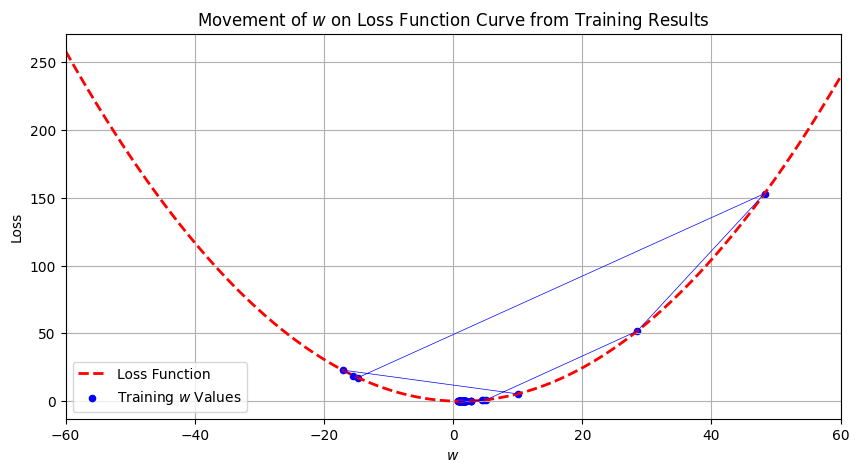

In [ ]:
# Plotting Loss Function Curve
plt.figure(figsize=(10, 5))
plt.plot(ws, loss_ws, 'r--', label='Loss Function', linewidth=2)

# Plotting w values from the training
plt.scatter(w_his, np.interp(w_his, ws, loss_ws), color='blue', s=20, label='Training $w$ Values')
plt.plot(w_his, np.interp(w_his, ws, loss_ws), color='blue', linestyle='-', linewidth=0.5)

plt.title('Movement of $w$ on Loss Function Curve from Training Results')
plt.xlabel('$w$')
plt.ylabel('Loss')
plt.xlim(-60, 60)
plt.legend()
plt.grid(True)
plt.show()

| Aspect                          | Stochastic Gradient Descent (SGD)                                   | Batch Gradient Descent (BGD)                                      |
|---------------------------------|---------------------------------------------------------------------|------------------------------------------------------------------|
| **Weight Update Frequency**     | After each training example                                        | After processing the entire dataset                               |
| **Data Utilized per Update**    | One data point at a time                                           | Entire dataset at once                                           |
| **Memory Requirements**         | Low (only one data point needed at a time)                         | High (requires entire dataset in memory)                         |
| **Computational Load per Update** | Low (computationally cheaper per update)                           | High (computationally expensive per update)                      |
| **Time Efficiency (Large Datasets)** | Generally more time-efficient due to faster iterations             | Less time-efficient due to high computational cost per iteration |
| **Convergence Path**            | Noisier, can oscillate around the minimum                          | Smoother, more direct path to the minimum                        |
| **Overall Time to Convergence** | Potentially longer due to more frequent but smaller updates        | Potentially shorter as each update is more comprehensive         |
| **Scalability**                 | Scales well with large datasets                                    | Limited scalability for very large datasets                      |
| **Suitability for Online Learning** | Well-suited for online/incremental learning scenarios             | Not suitable for online learning                                 |
| **Risk of Local Minima**        | Lower risk (frequent updates provide chances to escape local minima) | Higher risk (updates may converge to local minima)               |


# Exercise 2

**Manually calculate the gradients and new weights for the first three samples above!**

# 3. Why do we need DL fameworks such as Pytorch?

Deep Learning (DL) frameworks like PyTorch are very important for several reasons:

> - **Easy to Use:** They provide a simple way to build and train complex neural network models, without needing to understand all the low-level details of how the algorithms work.
- **Efficient:** They are optimized for performance, meaning that they can train models faster and use less memory than if you were to write the code from scratch.
- **Flexible:** They offer a lot of flexibility, allowing you to customize and tweak your models as needed.

nn.Linear(n,m) is a module that creates single layer feed forward network with n inputs and m output. Mathematically, this module is designed to calculate the linear equation Ax = b where x is input, b is output, A is weight. This is where the name 'Linear' came from.

![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/torch_nn_11.png)

The torch module provides all the necessary tensor operators you will need to implement your first neural network from scratch in PyTorch. That's right! In PyTorch everything is a Tensor, so this is the first thing you will need to get used to. Let's import the libraries we will need for this tutorial.

In [ ]:
import torch

# Convert the pandas Series to a PyTorch tensor
tensor_data_X = torch.tensor(data_s.X.values, dtype=torch.float32)
tensor_data_Y = torch.tensor(data_s.Y.values, dtype=torch.float32)

In [ ]:
tensor_data_X[0]

tensor(0.8710)

In [ ]:
tensor_data_X[0].reshape(-1)

tensor([0.8710])

In [ ]:
tensor_data_X.view(-1, 1).shape

torch.Size([63, 1])

In [ ]:
tensor_data_X.reshape(-1, 1).shape

torch.Size([63, 1])

### Batch Gradient Descent PyTorch

In [ ]:
import torch
from tqdm.notebook import tqdm

# Initializing Hyperparameters
epochs = 30
learning_rate = 2

# Initializing Parameters
w = 50

# Storing losses
loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net1 = torch.nn.Linear(1, 1, bias=False)
model_net1_actfun = torch.nn.Identity()
model_net1.weight.data.fill_(w)

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net1.parameters(), lr=learning_rate)

# Reshape tensor_data_X to (63, 1)
tensor_data_X_batchgradient = tensor_data_X.view(-1, 1)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in tqdm(range(epochs), total=epochs, unit="epoch"):

    # 2. Forward Pass
    output = model_net1_actfun(model_net1(tensor_data_X_batchgradient))

    # 3. FeedForward Evaluation
    loss = loss_mse(output, tensor_data_Y)
    optimizer.zero_grad()

    # 4. Backward Pass / Gradient Calculation
    loss.backward()

    # Store the loss for each epoch
    loss_set[epoch] = loss.item()

    # Display the loss after every epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

    # 5. Back Propagation / Update Weights
    optimizer.step()
    w_his.append(float(model_net1.weight.data[0][0]))

# Display final weight and loss
print("\nTraining complete!")
print(f"Final Weight: {model_net1.weight.data.item():.4f}")
print(f"Final Loss: {loss.item():.4f}")


  0%|          | 0/30 [00:00<?, ?epoch/s]

Epoch 1/30, Loss: 168.3560
Epoch 2/30, Loss: 88.2596
Epoch 3/30, Loss: 46.2852
Epoch 4/30, Loss: 24.2887
Epoch 5/30, Loss: 12.7615
Epoch 6/30, Loss: 6.7207
Epoch 7/30, Loss: 3.5550
Epoch 8/30, Loss: 1.8960
Epoch 9/30, Loss: 1.0267
Epoch 10/30, Loss: 0.5711
Epoch 11/30, Loss: 0.3323
Epoch 12/30, Loss: 0.2072
Epoch 13/30, Loss: 0.1416
Epoch 14/30, Loss: 0.1073
Epoch 15/30, Loss: 0.0893
Epoch 16/30, Loss: 0.0798
Epoch 17/30, Loss: 0.0749
Epoch 18/30, Loss: 0.0723
Epoch 19/30, Loss: 0.0709
Epoch 20/30, Loss: 0.0702
Epoch 21/30, Loss: 0.0699
Epoch 22/30, Loss: 0.0697
Epoch 23/30, Loss: 0.0696
Epoch 24/30, Loss: 0.0695
Epoch 25/30, Loss: 0.0695
Epoch 26/30, Loss: 0.0695
Epoch 27/30, Loss: 0.0695
Epoch 28/30, Loss: 0.0695
Epoch 29/30, Loss: 0.0695
Epoch 30/30, Loss: 0.0695

Training complete!
Final Weight: 0.6254
Final Loss: 0.0695


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([63])) that is different to the input size (torch.Size([63, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


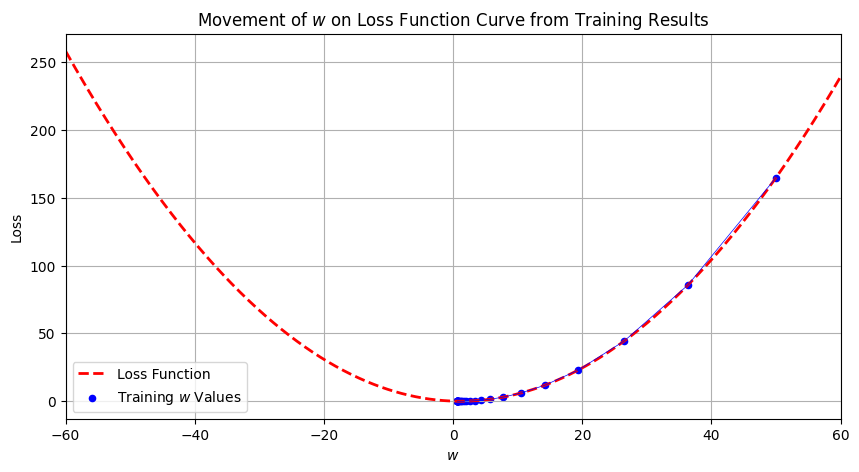

In [ ]:
# Plotting Loss Function Curve
plt.figure(figsize=(10, 5))
plt.plot(ws, loss_ws, 'r--', label='Loss Function', linewidth=2)

# Plotting w values from the training
plt.scatter(w_his, np.interp(w_his, ws, loss_ws), color='blue', s=20, label='Training $w$ Values')
plt.plot(w_his, np.interp(w_his, ws, loss_ws), color='blue', linestyle='-', linewidth=0.5)

plt.title('Movement of $w$ on Loss Function Curve from Training Results')
plt.xlabel('$w$')
plt.ylabel('Loss')
plt.xlim(-60, 60)
plt.legend()
plt.grid(True)
plt.show()

### Stochastic Gradient Descent PyTorch

In [ ]:
# Initializing Hyperparameters
epochs = 3
learning_rate = 2


# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net1 = torch.nn.Linear(1,1, bias=False)
model_net1_actfun = torch.nn.Identity()
model_net1.weight.data.fill_(w)

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_net1.parameters(), lr=learning_rate)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(tensor_data_X.size(0)):

      # 2. Forward Pass
      output = model_net1_actfun.forward(model_net1.forward(tensor_data_X[i].reshape(-1)))

      # 3. FeedForward Evaluation
      loss = loss_mse(output, tensor_data_Y[i].reshape(-1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

      # Store the weight value for each sample of data
      w_his.append(float(model_net1.weight.data[0][0]))

      # Display the loss for the current sample
      print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}, Weight: {model_net1.weight.data.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= tensor_data_X.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-26-00309b715b0d>:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1, Sample 1: Loss: 1816.3563, Weight: -98.4782
Epoch 1, Sample 2: Loss: 231.0042, Weight: -89.1628
Epoch 1, Sample 3: Loss: 88.0762, Weight: -85.2272
Epoch 1, Sample 4: Loss: 7435.1226, Weight: 259.6815
Epoch 1, Sample 5: Loss: 6969.8130, Weight: 151.9584
Epoch 1, Sample 6: Loss: 4822.8921, Weight: 24.2654
Epoch 1, Sample 7: Loss: 19.0626, Weight: 21.0261
Epoch 1, Sample 8: Loss: 4.7976, Weight: 20.0369
Epoch 1, Sample 9: Loss: 45.7595, Weight: 10.2173
Epoch 1, Sample 10: Loss: 0.4480, Weight: 10.0014
Epoch 1, Sample 11: Loss: 0.1252, Weight: 9.9444
Epoch 1, Sample 12: Loss: 10.6393, Weight: 4.8938
Epoch 1, Sample 13: Loss: 0.1432, Weight: 4.7595
Epoch 1, Sample 14: Loss: 0.6226, Weight: 4.1741
Epoch 1, Sample 15: Loss: 0.0144, Weight: 4.1470
Epoch 1, Sample 16: Loss: 0.0026, Weight: 4.1437
Epoch 1, Sample 17: Loss: 0.2328, Weight: 3.7702
Epoch 1, Sample 18: Loss: 0.0038, Weight: 3.7582
Epoch 1, Sample 19: Loss: 0.0065, Weight: 3.7504
Epoch 1, Sample 20: Loss: 0.1832, Weight: 3.4

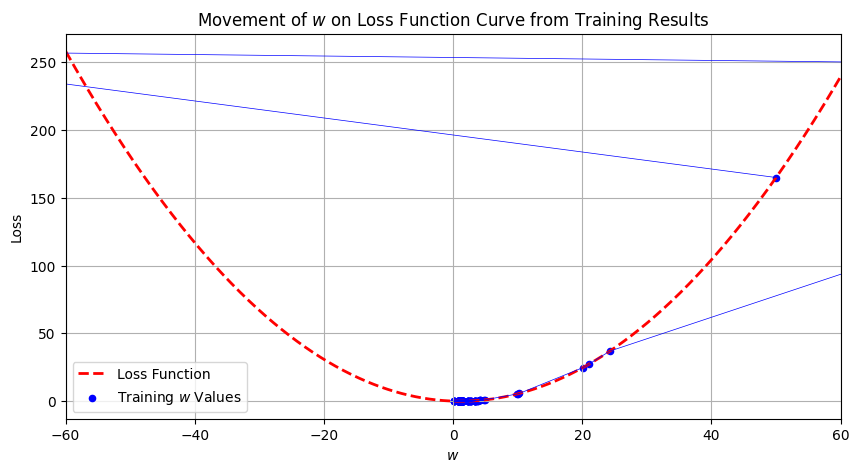

In [ ]:
# Plotting Loss Function Curve
plt.figure(figsize=(10, 5))
plt.plot(ws, loss_ws, 'r--', label='Loss Function', linewidth=2)

# Plotting w values from the training
plt.scatter(w_his, np.interp(w_his, ws, loss_ws), color='blue', s=20, label='Training $w$ Values')
plt.plot(w_his, np.interp(w_his, ws, loss_ws), color='blue', linestyle='-', linewidth=0.5)

plt.title('Movement of $w$ on Loss Function Curve from Training Results')
plt.xlabel('$w$')
plt.ylabel('Loss')
plt.xlim(-60, 60)
plt.legend()
plt.grid(True)
plt.show()

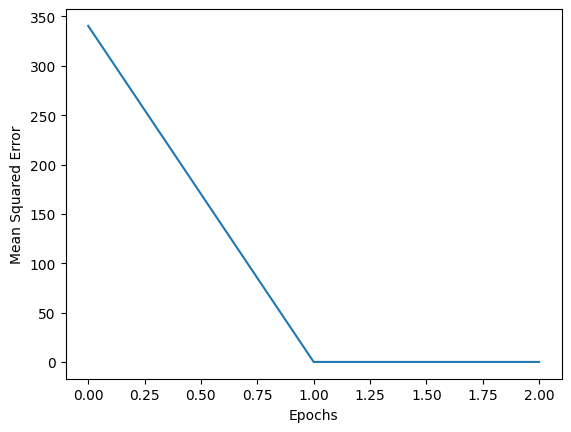

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

# 3.1 How can we implement an Neural Network with various layers, including input, hidden, and output layers?

nn.Sequential is a container module in PyTorch that allows you to define a simple and straightforward sequence of layers for a neural network, where the output of one layer is used as the input to the next layer, facilitating the easy construction and management of the network’s architecture.

![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/torch_nn_23_31.png)

In [ ]:
# Initializing Hyperparameters
epochs = 3
learning_rate = 2


# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net2 = torch.nn.Sequential(torch.nn.Linear(1,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(3,1),
                                 torch.nn.ReLU(),

                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_net2.parameters(), lr=learning_rate)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(tensor_data_X.size(0)):

      # 2. Forward Pass
      output = model_net2.forward(tensor_data_X[i].reshape(-1))

      # 3. FeedForward Evaluation
      loss = loss_mse(output, tensor_data_Y[i].reshape(-1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

      # Store the weight value for each sample of data
      w_his.append(float(model_net1.weight.data[0][0]))

      # Display the loss for the current sample
      print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= tensor_data_X.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-29-783233698abe>:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1, Sample 1: Loss: 0.2689
Epoch 1, Sample 2: Loss: 5.4803
Epoch 1, Sample 3: Loss: 0.0014
Epoch 1, Sample 4: Loss: 1.0000
Epoch 1, Sample 5: Loss: 0.0800
Epoch 1, Sample 6: Loss: 0.1639
Epoch 1, Sample 7: Loss: 0.0182
Epoch 1, Sample 8: Loss: 0.0337
Epoch 1, Sample 9: Loss: 0.2569
Epoch 1, Sample 10: Loss: 0.0239
Epoch 1, Sample 11: Loss: 0.0025
Epoch 1, Sample 12: Loss: 0.3453
Epoch 1, Sample 13: Loss: 0.0031
Epoch 1, Sample 14: Loss: 0.0088
Epoch 1, Sample 15: Loss: 0.0134
Epoch 1, Sample 16: Loss: 0.0002
Epoch 1, Sample 17: Loss: 0.1021
Epoch 1, Sample 18: Loss: 0.0145
Epoch 1, Sample 19: Loss: 0.0001
Epoch 1, Sample 20: Loss: 0.0716
Epoch 1, Sample 21: Loss: 0.0012
Epoch 1, Sample 22: Loss: 0.0133
Epoch 1, Sample 23: Loss: 0.0152
Epoch 1, Sample 24: Loss: 0.0010
Epoch 1, Sample 25: Loss: 0.0606
Epoch 1, Sample 26: Loss: 0.0337
Epoch 1, Sample 27: Loss: 0.0008
Epoch 1, Sample 28: Loss: 0.0540
Epoch 1, Sample 29: Loss: 0.0044
Epoch 1, Sample 30: Loss: 0.0081
Epoch 1, Sample 31:

# 3.2 How to avoid overfiting issue in a complex neural network?

Pruning in neural networks involves reducing the number of parameters in a model, which can lead to faster inference times and reduced risk of overfitting. Using nn.Dropout in PyTorch randomly sets a fraction of input units to 0 at each update during training, which can be thought of as a form of dynamic pruning, encouraging the network to develop redundant representations and potentially leading to a more robust and simpler model.

![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/torch_nn_dropout.png)

The dropout rate in a neural network specifies the probability that each neuron (or node) in the layer to which dropout is applied will be set to zero (i.e., “dropped out”) during a forward pass in training. This means that the neuron’s output will be temporarily ignored for that forward pass and the subsequent backward pass.

So, when you set a dropout rate of 0.33 (or 33%), you are specifying that, on average, 33% of the neurons in that layer will be set to zero during each training iteration.

In [ ]:
# Print the parameters of all layers
for name, param in model_net2.named_parameters():
    print(f"Layer: {name}")
    print(f"Size: {param.size()}")
    print(f"Values: \n{param.data}\n")

Layer: 0.weight
Size: torch.Size([3, 1])
Values: 
tensor([[ 0.7221],
        [ 0.2745],
        [-0.8347]])

Layer: 0.bias
Size: torch.Size([3])
Values: 
tensor([ 0.5356,  4.6321, -0.4273])

Layer: 3.weight
Size: torch.Size([1, 3])
Values: 
tensor([[-0.5409, -1.3394, -0.3475]])

Layer: 3.bias
Size: torch.Size([1])
Values: 
tensor([-6.8786])



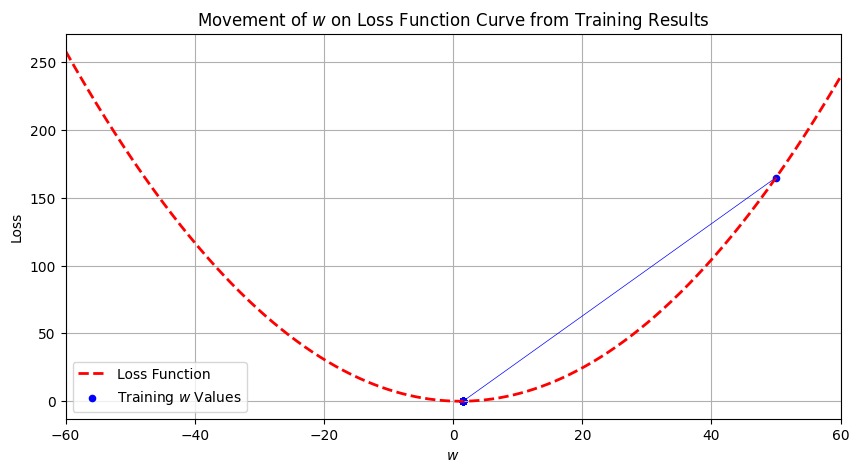

In [ ]:
# Plotting Loss Function Curve
plt.figure(figsize=(10, 5))
plt.plot(ws, loss_ws, 'r--', label='Loss Function', linewidth=2)

# Plotting w values from the training
plt.scatter(w_his, np.interp(w_his, ws, loss_ws), color='blue', s=20, label='Training $w$ Values')
plt.plot(w_his, np.interp(w_his, ws, loss_ws), color='blue', linestyle='-', linewidth=0.5)

plt.title('Movement of $w$ on Loss Function Curve from Training Results')
plt.xlabel('$w$')
plt.ylabel('Loss')
plt.xlim(-60, 60)
plt.legend()
plt.grid(True)
plt.show()

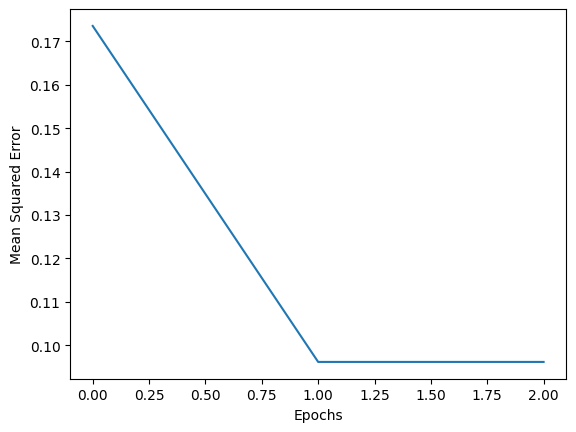

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

# 3.3 How to save and load a trained model using Pytorch?

## Saving the trained model

In [ ]:
# Now lets save our trained model
# save the trained model
torch.save(model_net2, 'model_net2.pkl')

## Loading the saved model


In [ ]:
#   Lets load the model for inference

model_net2_trained = torch.load('model_net2.pkl')
model_net2_trained.eval()

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.33, inplace=False)
  (3): Linear(in_features=3, out_features=1, bias=True)
  (4): ReLU()
)

In [ ]:
# Print the parameters of all layers
for name, param in model_net2_trained.named_parameters():
    print(f"Layer: {name}")
    print(f"Size: {param.size()}")
    print(f"Values: \n{param.data}\n")

Layer: 0.weight
Size: torch.Size([3, 1])
Values: 
tensor([[ 0.7221],
        [ 0.2745],
        [-0.8347]])

Layer: 0.bias
Size: torch.Size([3])
Values: 
tensor([ 0.5356,  4.6321, -0.4273])

Layer: 3.weight
Size: torch.Size([1, 3])
Values: 
tensor([[-0.5409, -1.3394, -0.3475]])

Layer: 3.bias
Size: torch.Size([1])
Values: 
tensor([-6.8786])



![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Exercise.png)